## Homework 2 for CSC488 done by Ivan Akinfiev

### Problem 1

$\textit{Prove:}$


$$ \mathbb{E} \left [ (X-w)^2 \right ] = \mathbb{E} \left [(X - \mu)^2 \right ]+ (\mu - w)^2  $$

$\textit{Proof:}$

$$ \mathbb{E} \left [ (X-w)^2 \right ] = \mathbb{E} \left [ (X^2 - \mu + \mu - w^2)^ \right ] =  $$
$$ \mathbb{E} \left [(X-\mu)^2 + 2(X-\mu)(X+\mu) + (\mu - w)^2 \right] = $$ 
$$ \mathbb{E} \left [(X-\mu)^2 \right ] + \mathbb{E} \left [(2(X-\mu)(X+\mu) \right ] + \left [ (\mu-w)^2 \right ] = $$  
$$ \mathbb{E} \left [(X-\mu)^2 \right ] + \left [ (\mu-w)^2 \right ], \; \text{since} \; \mathbb{E}(X) - \mu = 0, \; \text{so the middle term is 0} $$ 

### Problem 2 

### Problem 3

### Problem 4

In [86]:
%matplotlib inline

In [87]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt 
import seaborn as sns 


In [104]:
ms = [2**i for i in range(3, 11)]
ms

[8, 16, 32, 64, 128, 256, 512, 1024]

In [89]:
def generate_data(m, theta):
    output = []
    for i in range(m):
        x = np.random.uniform(size=1)
        if x > theta:
            output.append((x,1))
        else: 
            output.append((x,-1))
    return output

            

In [90]:
generate_data(8, 1/2)

[(array([0.43880041]), -1),
 (array([0.22247928]), -1),
 (array([0.83604399]), 1),
 (array([0.99834936]), 1),
 (array([0.75389328]), 1),
 (array([0.80240644]), 1),
 (array([0.33880846]), -1),
 (array([0.81279291]), 1)]

In [91]:
def erm_learn_theta(data, theta = 0):
    min_neg = 0
    max_pos = 1
    for i in range(len(data)):
        if data[i][0] > theta:
            if data[i][1] == 1:
                continue
            else: 
                theta = data[i][0]
        else: 
            if data[i][1] == -1:
                continue
            else:
                theta = data[i][0]
    return np.abs(theta - 1/2)

erm_learn_theta(generate_data(8, 1/2))


array([0.10132803])

It seems that in this case out generalization error will be just a difference between underlying distribution and the learned parameter. 

$$ err(\hat{h_m},\mathcal{D}) =  | \hat{\theta} - \theta |  $$ 

In [92]:
def evaluate_over_all_m(m_s):
    avg_errors = []
    for m in m_s:
        part_errors = []
        for i in range(200):
            data = generate_data(m, 1/2)
            part_errors.append(erm_learn_theta(data))
        avg_errors.append(sum(part_errors)/len(part_errors))
    return avg_errors
            
            
eval = evaluate_over_all_m(ms)
eval 

[array([0.11313296]),
 array([0.05714823]),
 array([0.02998369]),
 array([0.01523967]),
 array([0.00688693]),
 array([0.00371102]),
 array([0.00192506]),
 array([0.00098791])]

### b) 

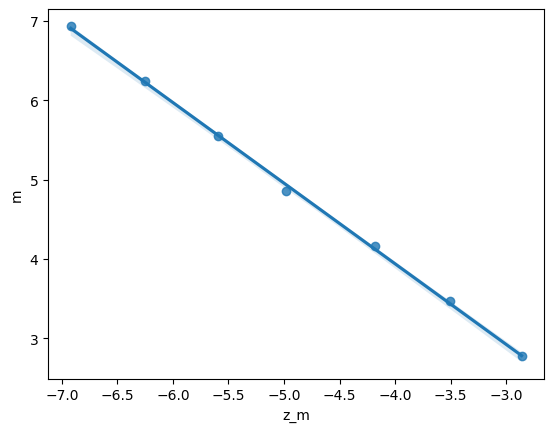

In [107]:
def generate_regression(data, m_s):
    for i in range(len(m_s)):
        data[i]= np.log(data[i])
        m_s[i] = np.log(m_s[i])
        data = np.array(data)
        data = np.squeeze(data)
        m_s = np.array(m_s)
        m_s = np.squeeze(m_s)
        
    df = pd.DataFrame({'m': m_s, 'z_m':data})
    #lm = sm.OLS(data, m_s).fit()
    return df

df = generate_regression(eval, ms)
sns.regplot(x='z_m', y='m', data=df)
plt.show()
    
        